## Sentiment Analysis to predict whether the review is Positive or Negative.

In [1]:
'''
    Movie Reviews Sentiment Analysis
    
    Author: Ashish Kumar
    
    SOme change
'''
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
import pandas as pd
import numpy as np
import time


In [2]:
import os
import sys
import time
import re
import unicodecsv as csv
import unicodedata as un
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

### Importing Natural Language Toolkit(NLTK) for symbolic and statistical natural language processing for English written words.

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ashish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Reading the train csv file generated by combining all the negative and positive reviews.

In [4]:
df_train = pd.read_csv('./data/data/train.csv')

In [5]:
df_train.head()

,label,data
0,0,working with one of the best shakespeare sourc...
1,0,welltremors i the original started off in and...
2,0,ouch this one was a bit painful to sit through...
3,0,ive seen some crappy movies in my life but thi...
4,0,carriers follows the exploits of two guys and ...


In [145]:
df_train.head(1)

,label,data
0,0,as an impressionable year old i liked the lov...


### Reading the test csv file generated by combining all the negative and positive reviews.

In [6]:
df_test = pd.read_csv('./data/data/test.csv')

In [7]:
df_test.head()

,label,data
0,0,alan rickman emma thompson give good performa...
1,0,i have seen this movie and i did not care for ...
2,0,in los angeles the alcoholic and lazy hank chi...
3,0,this film is bundled along with gli fumavano l...
4,0,i only comment on really very good films and o...


### Counting the number of tokens in train & test dataset 

In [8]:
counter = 0
counter1 = 0
for each_row in df_train['data']:
    counter += len(each_row)

for each_row in df_test['data']:
    counter1 += len(each_row)
print("Tokens in Train = ",counter)
print("Tokens in Test = ", counter1)

Tokens in Train =  31408120
Tokens in Test =  30660597


### Printing average number of tokens in each sentence in train and test dataset.

In [9]:
print("Average Tokens in Train in each sentence= ",counter/df_train.shape[0])
print("Average Tokens in Test in seach sentence = ", counter1/df_test.shape[0])

Average Tokens in Train in each sentence=  1256.3248
Average Tokens in Test in seach sentence =  1226.42388


In [10]:
from nltk.util import ngrams
from collections import Counter

tokens_list_train = df_train.data.tolist()
tokens_list_test = df_train.data.tolist()

In [11]:
tokens = []
for i in tokens_list_train:
    for j in i.split():
        tokens.append(j)
        
        

In [12]:
tokens[1:10]

['with', 'one', 'of', 'the', 'best', 'shakespeare', 'sources', 'this', 'film']

In [13]:
tokens_list_test[3].split()[2]

'some'

### Displaying the most common trigrams

In [14]:
trigram = ngrams(tokens,3)

Counter(trigram).most_common(10)
    

[(('one', 'of', 'the'), 4815),
 (('this', 'movie', 'is'), 2476),
 (('of', 'the', 'film'), 2361),
 (('a', 'lot', 'of'), 2255),
 (('this', 'is', 'a'), 2140),
 (('of', 'the', 'movie'), 2041),
 (('some', 'of', 'the'), 1855),
 (('is', 'one', 'of'), 1746),
 (('the', 'film', 'is'), 1686),
 (('this', 'film', 'is'), 1669)]

In [15]:
from nltk import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
tokenizer = TweetTokenizer()


### "TF-idf" term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

In [17]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenizer.tokenize)

In [18]:
#merge train & test list
full_text = tokens_list_train + tokens_list_test

In [19]:
%%time
vectorizer.fit(full_text)


CPU times: user 1min 23s, sys: 1.96 s, total: 1min 25s
Wall time: 1min 26s


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x1a317feeb8>>,
        use_idf=True, vocabulary=None)

In [151]:
idf = vectorizer.idf_
idf

array([ 1.03,  7.31, 10.72, ..., 10.72, 10.72, 10.72])

In [166]:
print(dict(zip(vectorizer.get_feature_names()[1056:1067], idf)))

{'a brigand': 1.034300933776877, 'a briget': 7.308938777693435, 'a bright': 10.721185995542177, 'a brighter': 10.721185995542177, 'a briish': 10.210360371776185, 'a brillant': 10.721185995542177, 'a brilliance': 10.721185995542177, 'a brilliancy': 10.721185995542177, 'a brilliant': 10.721185995542177, 'a brilliantly': 10.721185995542177, 'a brilliantmoving': 10.210360371776185}


In [164]:
vectorizer.vocabulary_

{'working': 1596401,
 'with': 1580996,
 'one': 1001296,
 'of': 972263,
 'the': 1372932,
 'best': 179284,
 'shakespeare': 1229213,
 'sources': 1285438,
 'this': 1419553,
 'film': 503023,
 'manages': 850981,
 'to': 1441201,
 'be': 157809,
 'creditable': 334669,
 'its': 743124,
 'source': 1285372,
 'whilst': 1566089,
 'still': 1307624,
 'appealing': 107222,
 'a': 0,
 'wider': 1573781,
 'audiencebranagh': 137173,
 'steals': 1304568,
 'from': 545958,
 'under': 1487604,
 'fishburnes': 517309,
 'nose': 956984,
 'and': 71860,
 'theres': 1411053,
 'talented': 1347609,
 'cast': 253528,
 'on': 996851,
 'good': 581522,
 'form': 535241,
 'working with': 1596571,
 'with one': 1585350,
 'one of': 1002876,
 'of the': 986860,
 'the best': 1374971,
 'best shakespeare': 180284,
 'shakespeare sources': 1229305,
 'sources this': 1285467,
 'this film': 1421251,
 'film manages': 504879,
 'manages to': 851005,
 'to be': 1441854,
 'be creditable': 158618,
 'creditable to': 334677,
 'to its': 1445793,
 'its sou

In [20]:
'''Shuffle the data before vectorizing it
    
    
'''
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_test = df_test.sample(frac=1).reset_index(drop=True)

In [21]:
df_train.head()

,label,data
0,0,as an impressionable year old i liked the lov...
1,1,first things first this movie is achingly beau...
2,0,considering its popularity i found this movie ...
3,1,time for a hitwaqt dir vipul amrutlal shah cas...
4,1,old horror movies are interesting plenty of sc...


In [22]:
df_test.head()

,label,data
0,0,i really wanted this to be good as i am from l...
1,1,let me just say i love the horror genre to th...
2,1,no one said that in the big trail and i though...
3,0,i like a good novelty song no i take that back...
4,1,a photographer in the small city of gunsan in ...


In [23]:
#transform our train & test data
train_vectorized = vectorizer.transform(df_train.data)
test_vectorized = vectorizer.transform(df_test.data)

In [24]:
#check the shape of transform data
print(train_vectorized.shape)

(25000, 1621814)


In [25]:
df_test['label'][0]

0

### Machine Learning Part starts here... 

### Training the model using Logistic Regression with One vs Rest Classifier. 

In [47]:
%%time
#Logistic Regression and One Vs Rest Classifier 

logreg = LogisticRegression()
ovr = OneVsRestClassifier(logreg)


CPU times: user 31 µs, sys: 52 µs, total: 83 µs
Wall time: 88.2 µs


In [48]:
%%time
y_pred = ovr.fit(train_vectorized, df_train.label.values)


/Users/ashish/Documents/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CPU times: user 12.4 s, sys: 447 ms, total: 12.8 s
Wall time: 7.3 s


### Accuracy of logistic Regression.

In [49]:

ovr.score(test_vectorized, df_test.label.values)

0.88392

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
def plot_coefficients(classifier, feature_names, top_features=20):
     coef = classifier.coef_.ravel()
     top_positive_coefficients = np.argsort(coef)[-top_features:]
     top_negative_coefficients = np.argsort(coef)[:top_features]
     top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
     # create plot
     plt.figure(figsize=(15, 5))
     colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
     plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
     feature_names = np.array(feature_names)
     plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
#      plt.gca().invert_yaxis()
     plt.show()
        

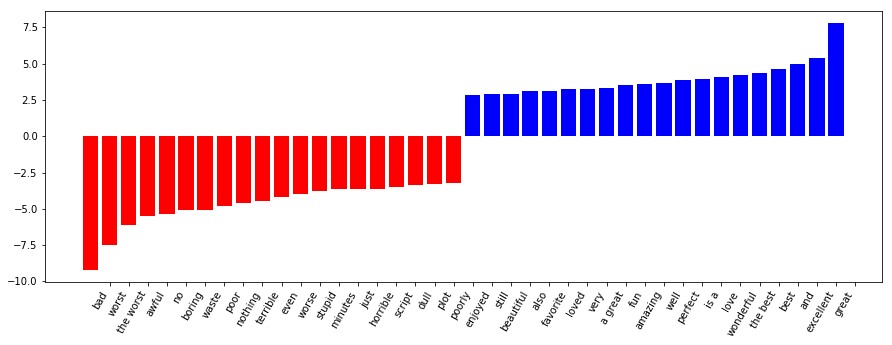

In [ ]:
plot_coefficients(ovr, vectorizer.get_feature_names())

In [61]:
review = ['I donot hate this movies']
review_vectorized = vectorizer.transform(review)

y_predict = ovr.predict(review_vectorized)

pred_review = "Positive"

for each_review, each_y_pred in zip(review, y_predict):
    if each_y_pred == 1:
        pred_review = "Positive"
    else:
        pred_review = "Negative"
    print("{0}: {1}".format(each_review, pred_review))

I donot hate this movies: Negative


In [47]:
%%time
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ovr, train_vectorized, df_train.label.values, scoring='accuracy', n_jobs=-1, cv=3)
print('Cross-validation mean accuracy {0:.2f}%, std {1:.2f}.'.format(np.mean(scores) * 100, np.std(scores) * 100))

Cross-validation mean accuracy 87.97%, std 0.17.
CPU times: user 138 ms, sys: 372 ms, total: 510 ms
Wall time: 18.2 s


In [48]:
#Try with different algorithms.
## - LogReg/SVM/NB/DT/NN
#    CrossVal

In [28]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [42]:
%%time
svc = SVC(gamma = 0.01, C = 100)
svc.fit(train_vectorized, df_train.label.values)
# scores_svc.fit(train_vectorized, df_train.label.values)

svm_acc = svc.score(test_vectorized, df_test.label.values)
print(svm_acc)

0.89912
CPU times: user 1h 21min 19s, sys: 34.6 s, total: 1h 21min 54s
Wall time: 8h 51min 14s


In [43]:
%%time
ovr = LogisticRegression()
param_grid = {'C': [0.1,10, 1000,5000]}
logistic_grid = GridSearchCV(ovr, param_grid, cv=10, refit=True, verbose=1)
logistic_grid.fit(train_vectorized, df_train.label.values)



log_acc = logistic_grid.score(test_vectorized, df_test.label.values)
print(log_acc)


Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/ashish/Documents/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  8.5min finished


0.90008
CPU times: user 16min 48s, sys: 22.6 s, total: 17min 11s
Wall time: 8min 54s


In [137]:
review = ['I hate this movie', 'I donot hate this movie', 'It was a good movie']
review_vectorized = vectorizer.transform(review)
y_predict = logistic_grid.predict(review_vectorized)

pred_review = "Positive"

for each_review, each_y_pred in zip(review, y_predict):
    if each_y_pred == 1:
        pred_review = "Positive"
    else:
        pred_review = "Negative"
    print("{0}: {1}".format(each_review, pred_review))

I hate this movie: Negative
I donot hate this movie: Negative
It was a good movie: Positive


In [32]:
%%time
# Multinomial NB
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(train_vectorized, df_train.label.values)
mnb_acc = mnb.score(test_vectorized, df_test.label.values)
print(mnb_acc)

0.86664
CPU times: user 622 ms, sys: 256 ms, total: 879 ms
Wall time: 715 ms


In [65]:
%%time
# BernouliNB
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(train_vectorized, df_train.label.values)
bnb_acc = bnb.score(test_vectorized, df_test.label.values)
print(bnb_acc)

0.84816
CPU times: user 1.01 s, sys: 98.4 ms, total: 1.11 s
Wall time: 618 ms


In [62]:
%%time
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_vectorized, df_train.label.values)
knn_acc = neigh.score(test_vectorized, df_test.label.values)

print(knn_acc)

0.66276
CPU times: user 1min 32s, sys: 18.9 s, total: 1min 51s
Wall time: 1min 54s


In [57]:
%%time
#Perceptron
from sklearn.linear_model import Perceptron
perc = Perceptron(tol=1e-3, random_state=0)
perc.fit(train_vectorized, df_train.label.values)
perc_acc = perc.score(test_vectorized, df_test.label.values)
print(perc_acc)

0.88192
CPU times: user 923 ms, sys: 16.3 ms, total: 940 ms
Wall time: 713 ms


In [138]:
review = ['I hate this movie', 'I donot hate this movie',]
review_vectorized = vectorizer.transform(review)
y_predict = perc.predict(review_vectorized)

pred_review = "Positive"

for each_review, each_y_pred in zip(review, y_predict):
    if each_y_pred == 1:
        pred_review = "Positive"
    else:
        pred_review = "Negative"
    print("{0}: {1}".format(each_review, pred_review))

I hate this movie: Negative
I donot hate this movie: Positive


In [29]:
%%time 
#KNN with GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': [3, 4, 5]}
ovr = KNeighborsClassifier()
logistic_grid = GridSearchCV(ovr, param_grid, cv=10, refit=True, verbose=1)
logistic_grid.fit(train_vectorized, df_train.label.values)
logistic_grid_acc = logistic_grid.score(train_vectorized, df_train.label.values)
print(logistic_grid_acc)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 45.3min finished


0.88292
CPU times: user 42min 39s, sys: 5min 15s, total: 47min 54s
Wall time: 47min 12s


In [30]:
%%time
#MLP Classifier for score = 'adam'
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(train_vectorized, df_train.label.values)
clf_acc = clf.score(test_vectorized, df_test.label.values)
print(clf_acc)

0.5
CPU times: user 24min 12s, sys: 3min 50s, total: 28min 3s
Wall time: 14min 27s


In [31]:
%%time
#MLP Classifier for score = 'lbfgs'
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(train_vectorized, df_train.label.values)
clf_acc = clf.score(test_vectorized, df_test.label.values)
print(clf_acc)

0.5
CPU times: user 13.4 s, sys: 1.35 s, total: 14.8 s
Wall time: 11.4 s


In [32]:
%%time
#MLP Classifier for score = 'sgd'
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(train_vectorized, df_train.label.values)
clf_acc = clf.score(test_vectorized, df_test.label.values)
print(clf_acc)

0.5
CPU times: user 16min 1s, sys: 2min 48s, total: 18min 49s
Wall time: 9min 44s


In [33]:
#MLP Classifier with GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [40]:
%%time 
param_grid = {'solver':['lbfgs', 'sgd', 'adam'] }
ovr = MLPClassifier(alpha=1e-5, hidden_layer_sizes = (5,2))
mlp_grid = GridSearchCV(ovr, param_grid, cv=5, refit=True, verbose=1)
mlp_grid_fit = mlp_grid.fit(train_vectorized, df_train.label.values)

print(mlp_grid_fit.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 257.7min finished


0.825
CPU times: user 8h 2min 31s, sys: 1h 41min 40s, total: 9h 44min 11s
Wall time: 7h 2s


In [41]:
print(mlp_grid_fit.best_estimator_)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


In [35]:
%%time
## Adaboost with logistic Regression.
from sklearn.ensemble import AdaBoostClassifier
log = LogisticRegression()
ada = AdaBoostClassifier(base_estimator=log, n_estimators=50, learning_rate=1.0,random_state=None)
ada.fit(train_vectorized, df_train.label.values)

%%time
ada_acc = ada.score(test_vectorized, df_test.label.values)
print(ada_acc)

0.7836
CPU times: user 5.85 s, sys: 117 ms, total: 5.96 s
Wall time: 3.11 s


In [36]:
%%time
## Adaboost with Percepton.
from sklearn.linear_model import Perceptron
perc = Perceptron(tol=1e-3, random_state=0)
ada = AdaBoostClassifier(base_estimator=perc, n_estimators=50, learning_rate=1.0,random_state=None, algorithm='SAMME')
ada.fit(train_vectorized, df_train.label.values)
ada_acc = ada.score(test_vectorized, df_test.label.values)
print(ada_acc)

0.88484
CPU times: user 45.9 s, sys: 1.07 s, total: 47 s
Wall time: 33.4 s


In [37]:
%%time
## GradientBoostingClassifier with MLP Classifier.
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(train_vectorized, df_train.label.values)
gbc_acc = gbc.score(test_vectorized, df_test.label.values)
print(gbc_acc)

0.81236
CPU times: user 12min 3s, sys: 8.61 s, total: 12min 12s
Wall time: 12min 6s


In [38]:
%%time
## Voting Classifier
from sklearn.ensemble import VotingClassifier

CPU times: user 13 µs, sys: 1e+03 ns, total: 14 µs
Wall time: 20 µs


In [39]:
%%time
#Decision Tree
# Decision Tree suffers very badly in high dimensional space.
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_vectorized, df_train.label.values)
dt_acc = dt.score(test_vectorized, df_test.label.values)
print(dt_acc)

0.70036
CPU times: user 5min 43s, sys: 2.81 s, total: 5min 45s
Wall time: 5min 53s


# Visualization

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create the wordcloud object
wordcloud_train = WordCloud(width=800, height=800, margin=0).generate(str(tokens_list_train))
# Display the generated image:
plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(wordcloud_train, interpolation='bilinear')
plt.show()

<Figure size 1000x1000 with 1 Axes>

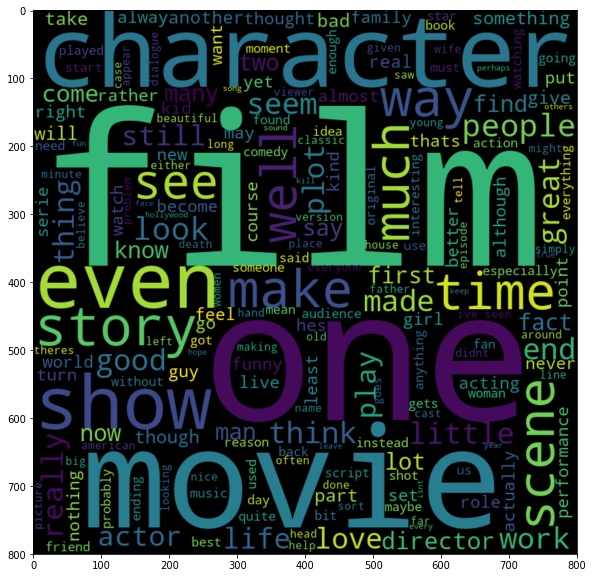

In [32]:
wordcloud_test = WordCloud(width=800, height=800, margin=0).generate(str(tokens_list_test))
# Display the generated image:
plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(wordcloud_test, interpolation='bilinear')
plt.show()

## Confusion -Matrix

In [68]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [69]:
%%time
# Compute confusion matrix

ovr.fit(train_vectorized, df_train.label.values)

/Users/ashish/Documents/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CPU times: user 12.5 s, sys: 437 ms, total: 13 s
Wall time: 7.49 s


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None)

In [70]:
y_pred = ovr.predict(test_vectorized)
cnf_matrix = confusion_matrix(df_test.label.values, y_pred)
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[10915  1585]
 [ 1317 11183]]
Normalized confusion matrix
[[0.87 0.13]
 [0.11 0.89]]


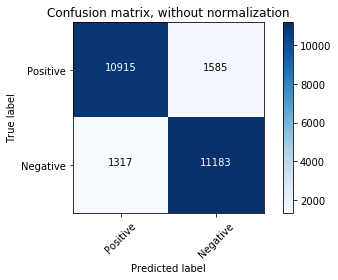

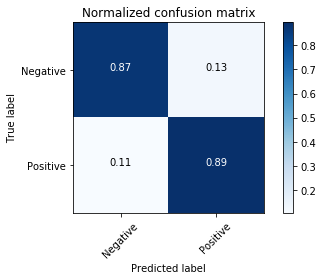

In [71]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Positive', 'Negative'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Negative', 'Positive'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## Manually creating a function to calculate accuracy instead of using ".score" 

In [72]:
def accuracy_func(y_test, y_pred):
    acc = 0
    for y, y_hat in zip(y_test, y_pred):
        if(y == y_hat):
            acc += 1
    return acc/len(y_pred)
print(accuracy_func(df_test['label'], y_pred))

0.88392


## Confusion Matrix ..calculating [True_Positive, True_Negative, False_Positive, False_Negative]

In [73]:
def accuracy_func(y_test, y_pred):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for y, y_hat in zip(y_test, y_pred):
        if(y == 1 and y_hat == 1):
            tp += 1
        elif(y == 1 and y_hat == 2):
            fp += 1
        elif(y == 2 and y_hat == 1):
            fn += 1
        else:
            tn += 1
    print("True Positive: ", tp)
    print("True Negative: ", tn)
    print("False Positive: ", fp)
    print("False Negative: ", fn)
    Recall = (tp/(tp + fn))
    Precision = (tp/(tp + fp))
    print("Recall: ", Recall)
    print('Precision: ', Precision)
accuracy_func(df_test['label'], y_pred)

True Positive:  11183
True Negative:  13817
False Positive:  0
False Negative:  0
Recall:  1.0
Precision:  1.0


In [120]:
acc_plot = pd.DataFrame.from_dict(dict([
                                        ('KNN Classifier', 66.27),
                                        ('MLP score=adam', 50.00),
                                        ('MLP score=sgd', 50.00), ('MLP score=lbfgs', 50.00),
                                       ('Decision Tree', 70.00)]),
                                  orient='index', columns=['Accuracy'])

In [202]:
acc_plot1 = pd.DataFrame.from_dict(dict([('KNN Classifier', 66.27),
                                        ('MLP score=adam', 50.00),
                                        ('MLP score=sgd', 50.00), ('MLP score=lbfgs', 50.00),
                                       ('Decision Tree', 70.00),('LogReg & OneVsRest', 88.39), ('Cross-Validation', 87.97), 
                                        ('SVM', 89.91), ('LogReg & GridSearchCV', 90.00),
                                        ('Multinomial NB', 86.66), ('Bernouli NB', 84.41),
                                        ('KNN with GridSearchCV', 88.29),('Perceptron', 88.19),
                                       ('MLP & GridSearchCV', 82.50),('Adaboost & logReg', 78.36),
                                       ('Adaboost & Percepton', 88.48), ('GradientBoostingClassifier', 81.23)]),
                                  orient='index', columns=['Accuracy'])

In [94]:
acc_plot

,Accuracy
LogReg & OneVsRest,88.39
Cross-Validation,87.97
SVM,89.91
LogReg & GridSearchCV,90.00
Multinomial NB,86.66
Bernouli NB,84.41
KNN Classifier,66.27
KNN with GridSearchCV,88.29
Perceptron,88.19
MLP score=adam,50.00


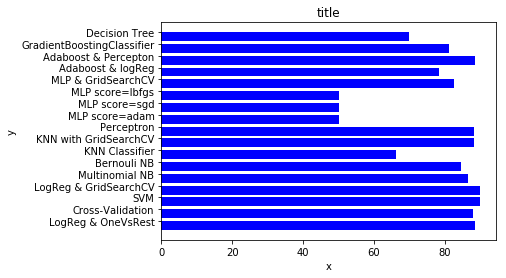

In [103]:
import os
import numpy as np
import matplotlib.pyplot as plt

x = ['LogReg & OneVsRest','Cross-Validation', 'SVM','LogReg & GridSearchCV','Multinomial NB', 'Bernouli NB',
  'KNN Classifier','KNN with GridSearchCV','Perceptron', 'MLP score=adam','MLP score=sgd','MLP score=lbfgs',
  'MLP & GridSearchCV','Adaboost & logReg','Adaboost & Percepton','GradientBoostingClassifier','Decision Tree']
y = [88.39, 87.97, 89.91, 90.00, 86.66, 84.41, 66.27, 88.29, 88.19, 50.00, 50.00, 50.00, 82.50, 78.36, 88.48, 81.23,70.00 ]

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('title')
plt.xlabel('x')
plt.ylabel('y')      
#plt.show()
plt.savefig(os.path.join('test.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial picture

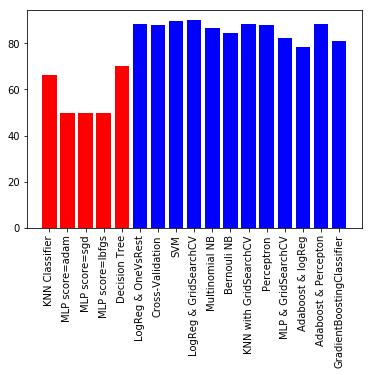

<Figure size 432x288 with 0 Axes>

In [248]:
# colors = []

# for value in acc_plot1.values: # keys are the names of the boys
#     if value <=70.0:
#         colors.append('red')
#     else:
#         colors.append('blue')
        
# def color_func(x):
#     return list(map(lambda x: 'red' if x <=70 else 'blue', x))

x = ['LogReg & OneVsRest','Cross-Validation', 'SVM','LogReg & GridSearchCV','Multinomial NB', 'Bernouli NB',
  'KNN Classifier','KNN with GridSearchCV','Perceptron', 'MLP score=adam','MLP score=sgd','MLP score=lbfgs',
  'MLP & GridSearchCV','Adaboost & logReg','Adaboost & Percepton','GradientBoostingClassifier','Decision Tree']
y = [88.39, 87.97, 89.91, 90.00, 86.66, 84.41, 66.27, 88.29, 88.19, 50.00, 50.00, 50.00, 82.50, 78.36, 88.48, 81.23,70.00 ]

y = np.asarray(y)
x = np.asarray(x)
mask1 = y<=70.0
mask2 = y>70.0
plt.bar(x[mask1], y[mask1], color = 'red')
plt.bar(x[mask2],y[mask2], color = 'blue')
plt.xticks(rotation = 'vertical')
plt.show()
plt.savefig(os.path.join('test3.png'), dpi=300, format='png', bbox_inches='tight')

In [237]:
print(color_func(acc_plot1.values))

['red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']


In [209]:
print(acc_plot1.values)
print(colors)

[[66.27]
 [50.  ]
 [50.  ]
 [50.  ]
 [70.  ]
 [88.39]
 [87.97]
 [89.91]
 [90.  ]
 [86.66]
 [84.41]
 [88.29]
 [88.19]
 [82.5 ]
 [78.36]
 [88.48]
 [81.23]]
['red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']


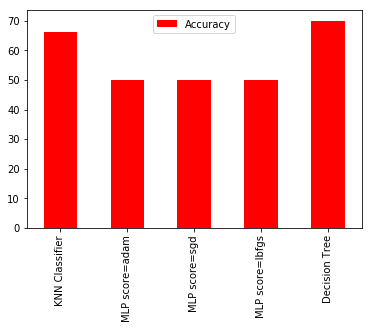

In [127]:
# Least performu=ing Algorithms < 70%
acc_plot.plot.bar(color = 'red')
plt.savefig(os.path.join('test.png'), dpi=300, format='png', bbox_inches='tight')

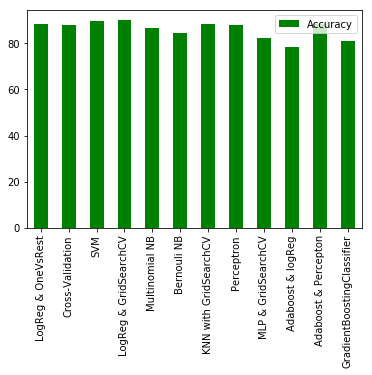

In [128]:
# Best performing Algorithms with accuracy > 80%
acc_plot1.plot.bar(color = 'green')
plt.savefig(os.path.join('test1.png'), dpi=300, format='png', bbox_inches='tight')

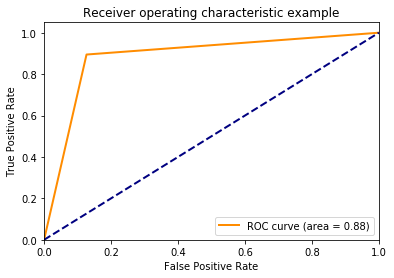

In [198]:
#ROC
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from scipy import interp

y_pred = ovr.predict(test_vectorized)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(df_test.label[:], y_pred[:])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(df_test.label.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()